# Cardiovascular Disease Death Rate Analysis

### Analysys scope : Contry :USA

In [1]:
#import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#Read the data from the CSV file
#The CSV file is located in the same folder where the jupyter notebook is located 
wa_cvd_death_df=pd.read_csv("Resources/cleaned_data.csv")
wa_cvd_death_df

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685
...,...,...,...,...,...,...,...,...,...,...,...
33426,2020,WA,Island County,Cardiovascular Diseases,Heart Disease Mortality,221.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,More than one race,48.046678,-122.562089
33427,2020,VA,Carroll County,Cardiovascular Diseases,Heart Disease Mortality,312.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,White,36.733046,-80.729746
33428,2020,VA,Petersburg City,Cardiovascular Diseases,Heart Disease Mortality,584.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,37.204297,-77.398058
33429,2020,VA,Lunenburg County,Cardiovascular Diseases,Heart Disease Mortality,455.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Black,36.951916,-78.245745


In [3]:
#filter only the overall fugures of each counties 
wa_cvd_death_overall=pd.DataFrame(wa_cvd_death_df.loc[(wa_cvd_death_df["Gender"]=="Overall") & (wa_cvd_death_df["Ethnicity"]=="Overall")])
wa_cvd_death_overall.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
40,2020,IA,Harrison County,Cardiovascular Diseases,Heart Disease Mortality,308.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,41.684772,-95.820331
52,2020,CO,Washington County,Cardiovascular Diseases,Heart Disease Mortality,256.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.964728,-103.198202
77,2020,IA,Bremer County,Cardiovascular Diseases,Heart Disease Mortality,333.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,42.776652,-92.322642
105,2020,GA,Jackson County,Cardiovascular Diseases,Heart Disease Mortality,427.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,34.139601,-83.564697
106,2020,AL,Lee County,Cardiovascular Diseases,Heart Disease Mortality,310.7,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.606458,-85.356228


In [4]:
#masp the states to region

state_to_region = {
        "CA":"West", 
        "OR":"West", 
        "WA":"West", 
        "NV":"West", 
        "ID":"West", 
        "UT":"West", 
        "CO":"West", 
        "WY":"West", 
        "MT":"West",
        "ND":"Midwest", 
        "SD":"Midwest", 
        "NE":"Midwest", 
        "KS":"Midwest",
        "MN":"Midwest", 
        "IA":"Midwest", 
        "MO":"Midwest",
        "WI":"Midwest", 
        "IL":"Midwest", 
        "IN":"Midwest", 
        "MI":"Midwest", 
        "OH":"Midwest",
        "AZ":"Southwest",
        "NM":"Southwest",
        "TX":"Southwest", 
        "OK":"Southwest",
        "AR":"Southeast",
        "LA":"Southeast",
        "MS":"Southeast", 
        "TN":"Southeast", 
        "AL":"Southeast",
        "KY":"Southeast", 
        "GA":"Southeast", 
        "WV":"Southeast", 
        "VA":"Southeast",
        "NC":"Southeast", 
        "SC":"Southeast", 
        "FL":"Southeast",
        "MD":"Southeast", 
        "DE":"Southeast",
        "CT":"Northeast",
        "DC":"Northeast", 
        "HI":"Northeast", 
        "ME":"Northeast", 
        "MA":"Northeast",
        "NH":"Northeast", 
        "NJ":"Northeast", 
        "NY":"Northeast", 
        "PA":"Northeast", 
        "RI":"Northeast", 
        "VT":"Northeast",
        "HI":"Noncontig",
        "AK":"Noncontig",
        "GU":"Noncontig",
        "MP":"Noncontig",
        "PR":"Noncontig",
        "AS":"Noncontig"
}

wa_cvd_death_overall['Region'] = wa_cvd_death_overall['State'].map(state_to_region)


In [5]:
#check for the blank regions
wa_cvd_death_overall.loc[wa_cvd_death_overall["Region"].isna()]

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude,Region


In [6]:
#Findig top and bottom five counties 
#Sort the data farme by Death_Rate Descending
wa_cvd_death_overall=wa_cvd_death_overall.sort_values(by='Death_Rate(per M)', ascending=False)
top_5=pd.DataFrame(wa_cvd_death_overall.head(5))
bottom_5=pd.DataFrame(wa_cvd_death_overall.tail(5))

#append top and bottom rcords 
top_bottom_5 = pd.concat([top_5,bottom_5])
top_bottom_5

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude,Region
10188,2020,LA,Franklin Parish,Cardiovascular Diseases,Heart Disease Mortality,859.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.140156,-91.669639,Southeast
14348,2020,KY,Perry County,Cardiovascular Diseases,Heart Disease Mortality,835.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,37.250079,-83.226845,Southeast
2966,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,834.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,33.810226,-87.297070,Southeast
14251,2020,LA,Caldwell Parish,Cardiovascular Diseases,Heart Disease Mortality,832.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,32.097542,-92.110670,Southeast
16164,2020,MO,Pemiscot County,Cardiovascular Diseases,Heart Disease Mortality,770.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,36.212067,-89.787787,Midwest
2540,2020,CO,Eagle County,Cardiovascular Diseases,Heart Disease Mortality,99.8,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.620840,-106.689275,West
27806,2020,SD,Oglala Lakota County,Cardiovascular Diseases,Heart Disease Mortality,78.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,43.331920,-102.555763,Midwest
5315,2020,CO,Summit County,Cardiovascular Diseases,Heart Disease Mortality,69.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,39.628867,-106.110871,West
1011,2020,AK,Kusilvak,Cardiovascular Diseases,Heart Disease Mortality,46.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,62.159507,-163.348983,Noncontig
4730,2020,AS,American Samoa County,Cardiovascular Diseases,Heart Disease Mortality,10.4,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,-14.301754,-170.719474,Noncontig


In [7]:
# Finding the country average 
country_avg=wa_cvd_death_overall["Death_Rate(per M)"].mean()
country_avg

364.46149068322984

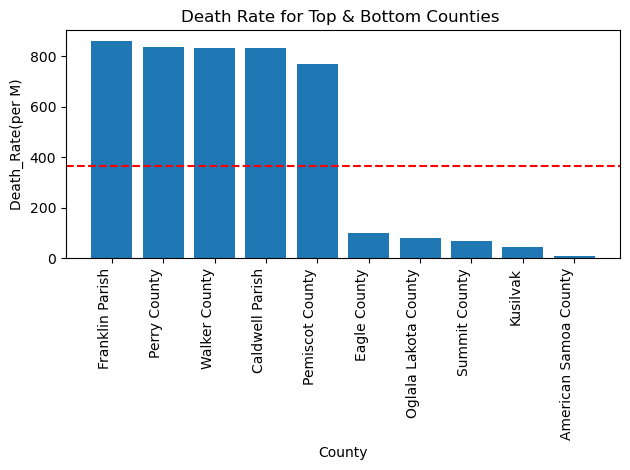

In [8]:
#plot the top and bottom higher rates in the country

top_bottom_5 = top_bottom_5.sort_values(by='Death_Rate(per M)', ascending=False)

x_axis=top_bottom_5["County"].unique()
y_axis_death=top_bottom_5["Death_Rate(per M)"]


plt.bar(x_axis, y_axis_death)
plt.axhline(y=country_avg, color='r', linestyle='--', label='Average')
plt.xlabel('County')
plt.ylabel("Death_Rate(per M)")
plt.title('Death Rate for Top & Bottom Counties ')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Outputs/wa_top_bottom_counties.png")
plt.xticks(rotation=90, ha='right')
plt.show()

In [9]:
#Display all the counties witht the death rates in a map visual
#limit the map visual only to the USA
# Get the bounding box coordinates for the selected country (United States bounding box coordinates)
us_bbox = [-125, 24, -66, 50]  # [min_longitude, min_latitude, max_longitude, max_latitude]

top_bottom_5_conties = top_bottom_5.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "CartoLight",
    frame_width = 750,
    frame_height = 500,
    size = "Death_Rate(per M)", 
    xlim=(us_bbox[0], us_bbox[2]),
    ylim=(us_bbox[1], us_bbox[3]), 
    color = "County",
    hover_cols=["City","Death_Rate(per M)"]
)
# Display the map
#hvplot.save(top_bottom_5_conties, 'wa_map_topbottom.png')
#hv.save(top_bottom_5_conties, 'wa_map_topbottom.png')
top_bottom_5_conties

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (County,Death_Rate(per M))

In [10]:
#Find the region average CVD detah rates
region_rates =wa_cvd_death_overall.groupby("Region")["Death_Rate(per M)"].mean()
region_rates

Region
Midwest      347.030616
Noncontig    224.794643
Northeast    324.893578
Southeast    414.421376
Southwest    397.621372
West         297.888251
Name: Death_Rate(per M), dtype: float64

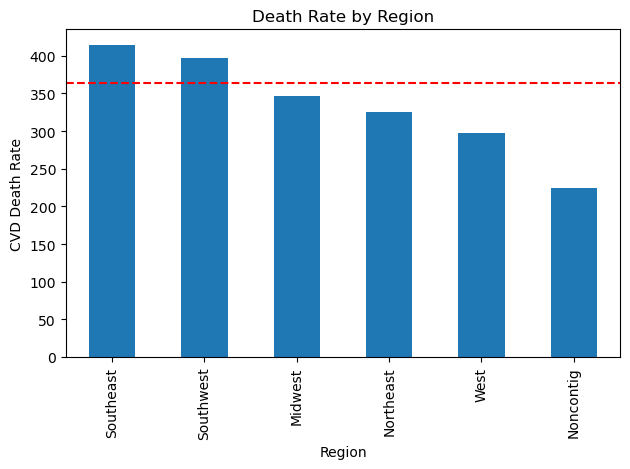

In [11]:
#plot the region CVD death rates
region_rates=region_rates.sort_values(ascending=False)
region_chart = region_rates.plot(kind="bar", title="Death Rate by Region")
region_chart.set_xlabel("Region")
region_chart.set_ylabel("CVD Death Rate")
plt.axhline(y=country_avg, color='r', linestyle='--', label='Average')
plt.tight_layout()
plt.savefig("Outputs/wa_region_rates.png")
plt.show()


In [18]:
#Merge the CVD detah rates data with smoking rates
smoking_df=pd.read_csv("Resources/SmokingRates.csv")
smoking_df

,State,State_Desc,Smoking Rate
0,AL,Alabama,20.90%
1,AK,Alaska,21.00%
2,AZ,Arizona,15.60%
3,AR,Arkansas,22.30%
4,CA,California,11.30%
5,CO,Colorado,14.60%
6,CT,Connecticut,12.70%
7,DE,Delaware,17.00%
8,DE,District of Columbia,14.30%
9,FL,Florida,16.10%


In [13]:
#Get the average CVD deth rate for all the States 
Sates_avg =wa_cvd_death_overall.groupby("State")["Death_Rate(per M)"].mean()


In [19]:
#join CVD data with Smoking data
Sates_avg_cvd_smk=pd.merge(Sates_avg,smoking_df,how="left", on=["State", "State"])
Sates_avg_cvd_smk.loc[Sates_avg_cvd_smk["Smoking Rate"].isna()]

,State,Death_Rate(per M),State_Desc,Smoking Rate
8,DC,355.800000,NaN,NaN
28,MP,290.500000,NaN,NaN
43,PR,202.578205,NaN,NaN


In [15]:
#clean data set
Sates_avg_cvd_smk = Sates_avg_cvd_smk.dropna()
Sates_avg_cvd_smk.loc[Sates_avg_cvd_smk["Smoking Rate"].isna()]


,State,Death_Rate(per M),State_Desc,Smoking Rate


In [16]:
#Check data types
Sates_avg_cvd_smk.info()
Sates_avg_cvd_smk["Smoking Rate"]=Sates_avg_cvd_smk["Smoking Rate"].str.split(pat='%').str[0]
Sates_avg_cvd_smk["Smoking Rate"]=Sates_avg_cvd_smk["Smoking Rate"].astype('float')
Sates_avg_cvd_smk

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 55
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              53 non-null     object 
 1   Death_Rate(per M)  53 non-null     float64
 2   State_Desc         53 non-null     object 
 3   Smoking Rate       53 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.1+ KB


,State,Death_Rate(per M),State_Desc,Smoking Rate
0,AK,280.192308,Alaska,21.00
1,AL,488.714925,Alabama,20.90
2,AR,464.186667,Arkansas,22.30
3,AS,10.400000,Alaska,17.00
4,AZ,302.193333,Arizona,15.60
5,CA,290.860345,California,11.30
6,CO,255.756250,Colorado,14.60
7,CT,279.087500,Connecticut,12.70
9,DE,316.266667,Delaware,17.00
10,DE,316.266667,District of Columbia,14.30


The correlation coefficient between Smoking Rate and Death_Rate(per M) is: 0.51
 The r-squared is: 0.256546674757159


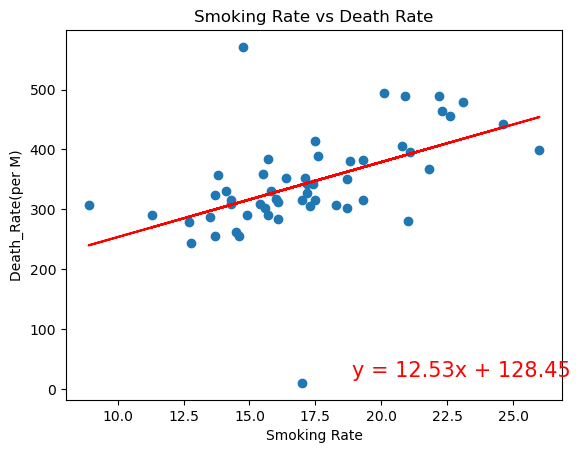

In [17]:
#Analysis between smoking rate and the CVD death rate
x_values=Sates_avg_cvd_smk["Smoking Rate"]
y_values=Sates_avg_cvd_smk["Death_Rate(per M)"]

print(f"The correlation coefficient between Smoking Rate and Death_Rate(per M) is: {round(st.pearsonr(x_values,y_values)[0],2)}")

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min()+10,y_values.min()+10),fontsize=15,color="red")
plt.title("Smoking Rate vs Death Rate")
plt.xlabel("Smoking Rate")
plt.ylabel("Death_Rate(per M)")
print(f" The r-squared is: {rvalue**2}")
plt.savefig("Outputs/wa_smoking_vs_death.png")
plt.show()


# Conclution 
### When check the top and bottom values of the CVD death rate for all the counties, it can be seen that there are some counties which rates far higher (almost double than the country average) than the country average and some are far below the country average.
### When plot these data in a map visual , higher CVD death rates counties are in most southeast region and low rates counties are middle of the country.
### Higer CVD death rates can be seen in the south region of the country having average CVD death rate above the country average. ### Correlation Coefficient 

### In this analysis correlation coefficient (r) values between smoking rate and the CVD death rate is + 0.59.
### This means there is a positive relationship between smoking rate and the CVD death rate.
### But, when  you see the r-squared value, it is 0.3475 and means only  34% chance of changing the CVD death rate by changing the smoking rate.


